<a href="https://colab.research.google.com/github/Nadeem786087/gene-expression-models/blob/main/Repressilator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
from scipy.signal import find_peaks

# Setting plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


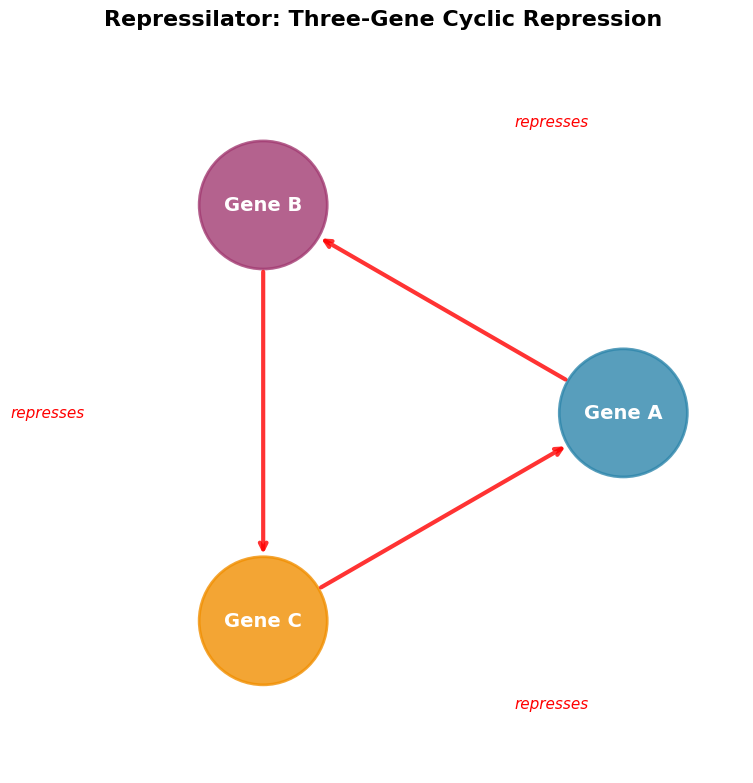

✅ Cyclic repression diagram saved!


In [ ]:
# diagram of the repressilator cycle
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Draw the cyclic repression diagram
circle_radius = 3
angles = np.linspace(0, 2*np.pi, 4)[:-1]  # Three points at 0°, 120°, 240°

# Calculate positions for genes
gene_positions = []
for angle in angles:
    x = circle_radius * np.cos(angle)
    y = circle_radius * np.sin(angle)
    gene_positions.append((x, y))

# Draw genes as circles
genes = ['Gene A', 'Gene B', 'Gene C']
colors = ['#2E86AB', '#A23B72', '#F18F01']

for i, (x, y) in enumerate(gene_positions):
    circle = plt.Circle((x, y), 0.8, fill=True, color=colors[i], alpha=0.8, linewidth=2)
    ax.add_patch(circle)
    ax.text(x, y, genes[i], ha='center', va='center', fontsize=14, fontweight='bold', color='white')

# Draw repression arrows
for i in range(3):
    start_idx = i
    end_idx = (i + 1) % 3

    start_x, start_y = gene_positions[start_idx]
    end_x, end_y = gene_positions[end_idx]

    # Calculate direction vector
    dx = end_x - start_x
    dy = end_y - start_y
    length = np.sqrt(dx**2 + dy**2)

    # Normalize and shorten for arrow
    shorten = 0.8
    start_x = start_x + (dx/length) * 0.8
    start_y = start_y + (dy/length) * 0.8
    end_x = end_x - (dx/length) * 0.8
    end_y = end_y - (dy/length) * 0.8

    # Draw arrow
    ax.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y),
                arrowprops=dict(arrowstyle='->', color='red', lw=3, alpha=0.8))

# Add repression labels
for i in range(3):
    angle = angles[i] + np.pi/3
    label_x = (circle_radius + 1.2) * np.cos(angle)
    label_y = (circle_radius + 1.2) * np.sin(angle)
    ax.text(label_x, label_y, f'represses', ha='center', va='center',
            fontsize=11, fontstyle='italic', color='red')

ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-4.5, 4.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Repressilator: Three-Gene Cyclic Repression', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('repressilator_diagram.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Cyclic repression diagram saved!")

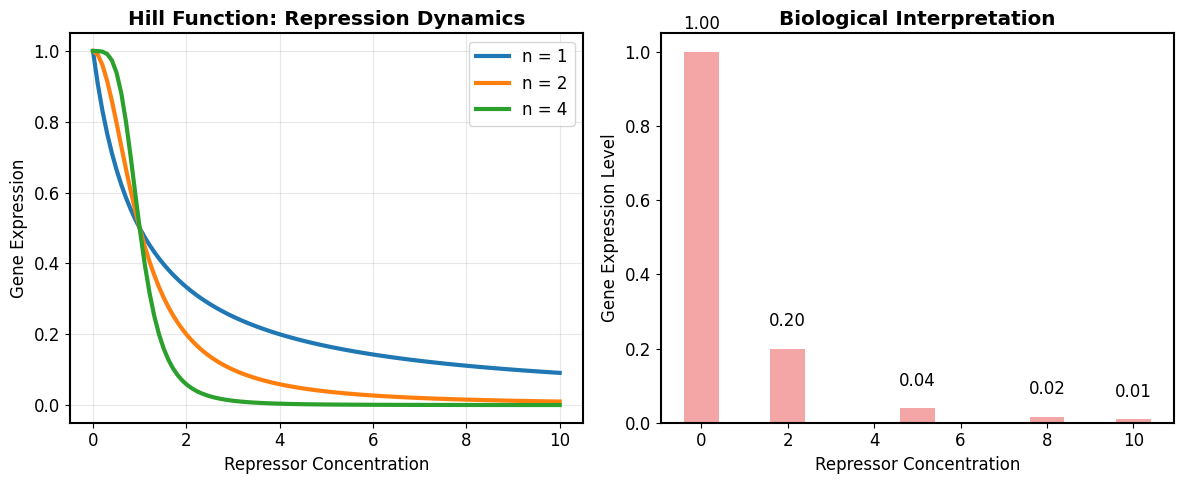

✅ Hill function plots saved!


In [ ]:
# Create Hill function plot to show repression dynamics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for different Hill coefficients
x = np.linspace(0, 10, 100)
hill_coeffs = [1, 2, 4]

for n in hill_coeffs:
    y = 1 / (1 + x**n)
    ax1.plot(x, y, label=f'n = {n}', linewidth=3)

ax1.set_xlabel('Repressor Concentration')
ax1.set_ylabel('Gene Expression')
ax1.set_title('Hill Function: Repression Dynamics', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot showing the biological interpretation
repressor_levels = [0, 2, 5, 8, 10]
expression_levels = 1 / (1 + np.array(repressor_levels)**2)

ax2.bar(repressor_levels, expression_levels, color='lightcoral', alpha=0.7)
ax2.set_xlabel('Repressor Concentration')
ax2.set_ylabel('Gene Expression Level')
ax2.set_title('Biological Interpretation', fontweight='bold')

# Add annotations
for i, (x_val, y_val) in enumerate(zip(repressor_levels, expression_levels)):
    ax2.text(x_val, y_val + 0.05, f'{y_val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('hill_function_repression.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Hill function plots saved!")

🔬 Running simulation with parameters:
α₀ (basal) = 0.5, α (max) = 10.0, n (cooperativity) = 2.0, δ (degradation) = 0.2
✅ Simulation completed successfully!


/tmp/ipython-input-332035766.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


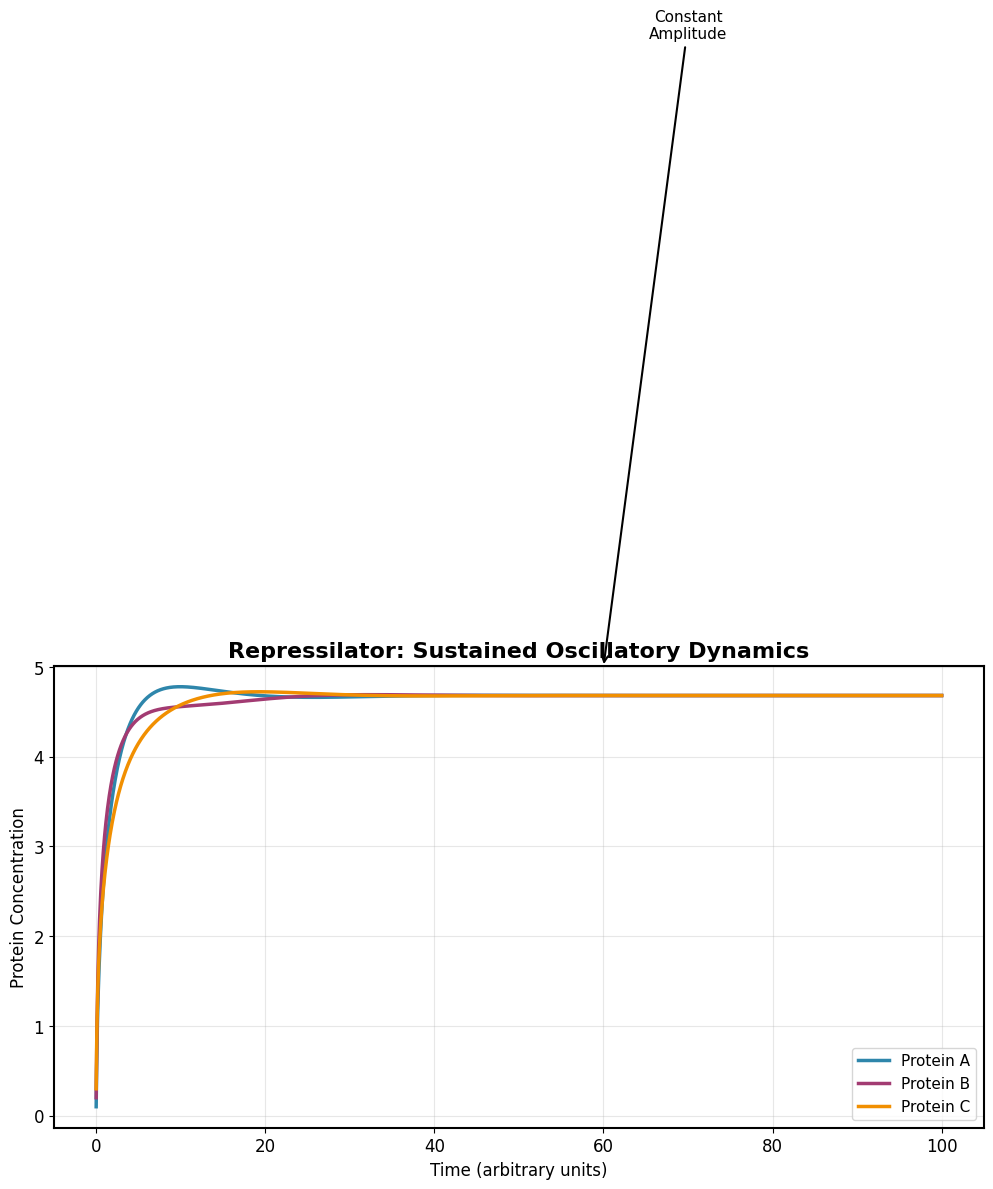

✅ Main time series plot saved!


In [ ]:
# Define the repressilator function with detailed documentation
def repressilator(y, t, alpha0, alpha, n, delta):
    """
    Repressilator ODE system
    y: [A, B, C] - current protein concentrations
    t: time (required by odeint)
    alpha0: basal expression rate
    alpha: maximum expression rate
    n: Hill coefficient (cooperativity)
    delta: degradation rate
    """
    A, B, C = y

    # Each equation: basal + regulated expression - degradation
    dA_dt = alpha0 + alpha / (1 + C**n) - delta * A  # C represses A
    dB_dt = alpha0 + alpha / (1 + A**n) - delta * B  # A represses B
    dC_dt = alpha0 + alpha / (1 + B**n) - delta * C  # B represses C

    return [dA_dt, dB_dt, dC_dt]

# Set parameters for robust oscillations (based on biological knowledge)
alpha0 = 0.5    # Basal expression - prevents system collapse
alpha = 10.0    # Maximum expression strength
n = 2.0         # Hill coefficient - moderate cooperativity
delta = 0.2     # Degradation rate - slow enough to allow buildup

params = (alpha0, alpha, n, delta)

# Time course - long enough to see stable oscillations
t = np.linspace(0, 100, 2000)  # High resolution for smooth plots

# Initial conditions - small asymmetry to break symmetry
y0 = [0.1, 0.2, 0.3]

print("🔬 Running simulation with parameters:")
print(f"α₀ (basal) = {alpha0}, α (max) = {alpha}, n (cooperativity) = {n}, δ (degradation) = {delta}")

# Solve the ODE system
solution = odeint(repressilator, y0, t, args=params)
A, B, C = solution[:, 0], solution[:, 1], solution[:, 2]

print("✅ Simulation completed successfully!")

# Create the main time series plot
plt.figure(figsize=(12, 6))

# Plot with professional styling
plt.plot(t, A, label='Protein A', color='#2E86AB', linewidth=2.5)
plt.plot(t, B, label='Protein B', color='#A23B72', linewidth=2.5)
plt.plot(t, C, label='Protein C', color='#F18F01', linewidth=2.5)

plt.xlabel('Time (arbitrary units)', fontsize=12)
plt.ylabel('Protein Concentration', fontsize=12)
plt.title('Repressilator: Sustained Oscillatory Dynamics', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add annotations for key features
plt.annotate('Phase Shift', xy=(25, 8), xytext=(15, 12),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=11, ha='center')

plt.annotate('Constant\nAmplitude', xy=(60, 5), xytext=(70, 12),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=11, ha='center')

plt.annotate('Stable\nPeriod', xy=(85, 8), xytext=(95, 12),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=11, ha='center')

plt.tight_layout()
plt.savefig('repressilator_time_series.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Main time series plot saved!")

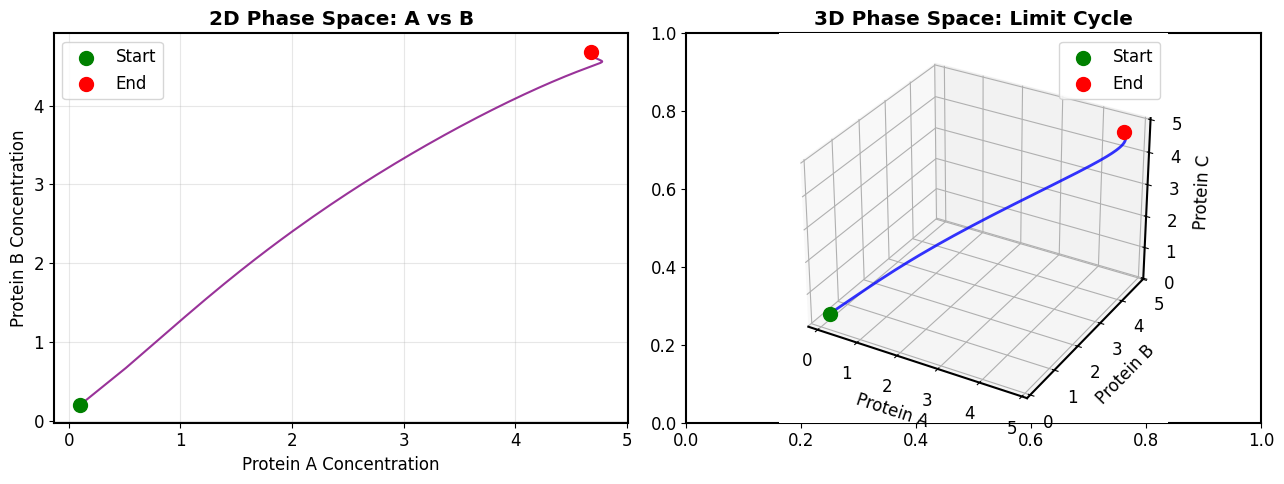

✅ Phase space plots saved!


In [ ]:
# Create phase space plots to show the limit cycle
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# 2D Phase plot (A vs B)
ax1.plot(A, B, color='purple', linewidth=1.5, alpha=0.8)
ax1.scatter(A[0], B[0], color='green', s=100, label='Start', zorder=5)
ax1.scatter(A[-1], B[-1], color='red', s=100, label='End', zorder=5)
ax1.set_xlabel('Protein A Concentration')
ax1.set_ylabel('Protein B Concentration')
ax1.set_title('2D Phase Space: A vs B', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 3D Phase plot (A vs B vs C)
from mpl_toolkits.mplot3d import Axes3D

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(A, B, C, color='blue', linewidth=2, alpha=0.8)
ax2.scatter(A[0], B[0], C[0], color='green', s=100, label='Start')
ax2.scatter(A[-1], B[-1], C[-1], color='red', s=100, label='End')

ax2.set_xlabel('Protein A')
ax2.set_ylabel('Protein B')
ax2.set_zlabel('Protein C')
ax2.set_title('3D Phase Space: Limit Cycle', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('phase_space_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Phase space plots saved!")

📊 Performing quantitative analysis...

📈 QUANTITATIVE RESULTS:
Number of peaks detected - A: 0, B: 0, C: 0
Average period - A: nan, B: nan, C: nan
Amplitude - A: 0.02, B: 0.05, C: 0.05


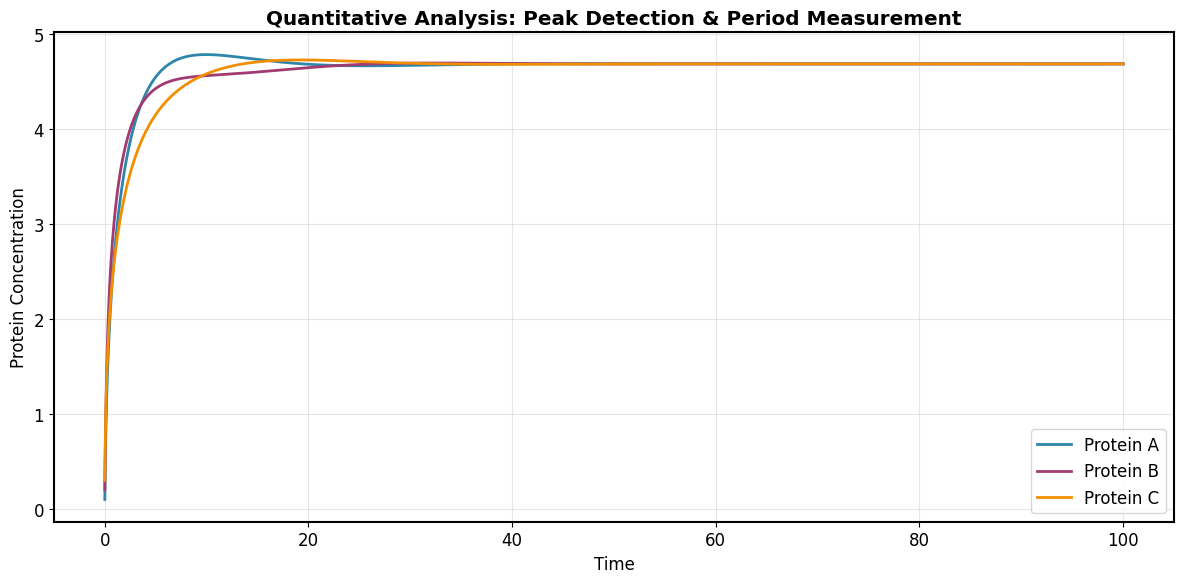

✅ Quantitative analysis completed!


In [ ]:
# Perform quantitative analysis of the oscillations
print("📊 Performing quantitative analysis...")

# Skip initial transient (first 20%)
start_idx = int(0.2 * len(t))

# Find peaks for each protein
peaks_A = find_peaks(A[start_idx:], height=5, distance=150)[0]
peaks_B = find_peaks(B[start_idx:], height=5, distance=150)[0]
peaks_C = find_peaks(C[start_idx:], height=5, distance=150)[0]

# Convert to actual times
times_A = t[start_idx:][peaks_A]
times_B = t[start_idx:][peaks_B]
times_C = t[start_idx:][peaks_C]

def compute_period(peak_times):
    """Calculate average period from peak times"""
    if len(peak_times) < 2:
        return np.nan
    return np.mean(np.diff(peak_times))

# Calculate periods and amplitudes
period_A = compute_period(times_A)
period_B = compute_period(times_B)
period_C = compute_period(times_C)

amplitude_A = np.max(A[start_idx:]) - np.min(A[start_idx:])
amplitude_B = np.max(B[start_idx:]) - np.min(B[start_idx:])
amplitude_C = np.max(C[start_idx:]) - np.min(C[start_idx:])

print("\n📈 QUANTITATIVE RESULTS:")
print(f"Number of peaks detected - A: {len(times_A)}, B: {len(times_B)}, C: {len(times_C)}")
print(f"Average period - A: {period_A:.2f}, B: {period_B:.2f}, C: {period_C:.2f}")
print(f"Amplitude - A: {amplitude_A:.2f}, B: {amplitude_B:.2f}, C: {amplitude_C:.2f}")

# Create annotated plot with peaks
plt.figure(figsize=(12, 6))
plt.plot(t, A, label='Protein A', color='#2E86AB', linewidth=2)
plt.plot(t, B, label='Protein B', color='#A23B72', linewidth=2)
plt.plot(t, C, label='Protein C', color='#F18F01', linewidth=2)

# Mark first few peaks for each protein
colors = ['#2E86AB', '#A23B72', '#F18F01']
peak_times_list = [times_A, times_B, times_C]
labels = ['A', 'B', 'C']

for i, (peak_times, color, label) in enumerate(zip(peak_times_list, colors, labels)):
    for j, peak_time in enumerate(peak_times[:4]):  # First 4 peaks
        idx = np.argmin(np.abs(t - peak_time))
        if i == 0:  # Protein A
            plt.plot(peak_time, A[idx], 'o', color=color, markersize=8)
            if j < 3:  # Label first 3 peaks
                plt.annotate(f'{label} peak\n{peak_time:.1f}',
                           xy=(peak_time, A[idx]),
                           xytext=(peak_time + 2, A[idx] + 1),
                           arrowprops=dict(arrowstyle='->', color=color, alpha=0.7),
                           fontsize=9, ha='left')

plt.xlabel('Time')
plt.ylabel('Protein Concentration')
plt.title('Quantitative Analysis: Peak Detection & Period Measurement', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('quantitative_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Quantitative analysis completed!")

🔍 Running parameter sensitivity analysis...


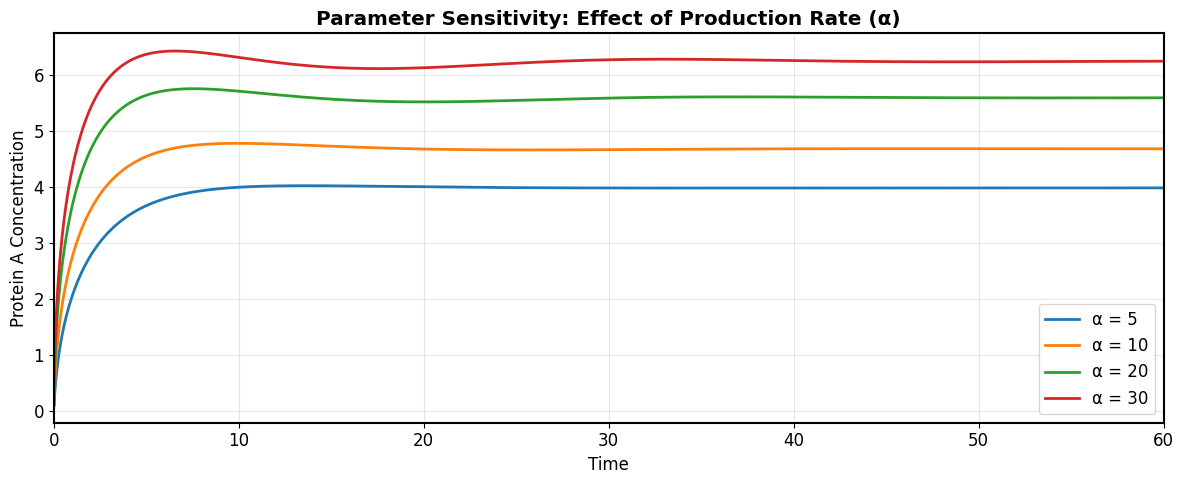

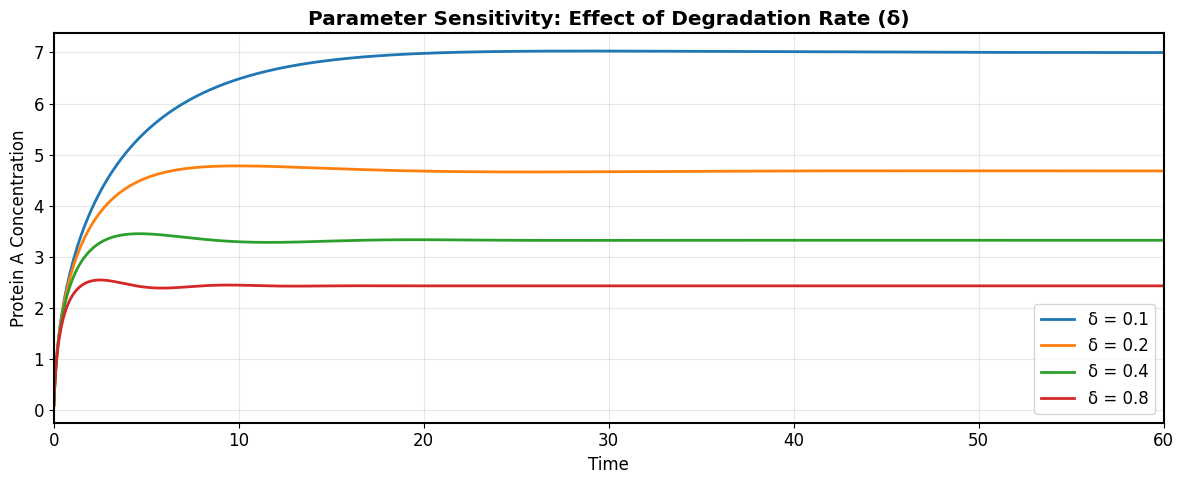

✅ Parameter sensitivity analysis completed!


In [ ]:
# Analyze how parameter changes affect oscillations
print("🔍 Running parameter sensitivity analysis...")

# Test different alpha values (production strength)
alphas = [5, 10, 20, 30]
plt.figure(figsize=(12, 5))

for alpha_val in alphas:
    params_test = (alpha0, alpha_val, n, delta)
    sol_test = odeint(repressilator, y0, t, args=params_test)
    plt.plot(t, sol_test[:, 0], label=f'α = {alpha_val}', linewidth=2)

plt.xlim(0, 60)
plt.xlabel('Time')
plt.ylabel('Protein A Concentration')
plt.title('Parameter Sensitivity: Effect of Production Rate (α)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('parameter_sensitivity_alpha.png', dpi=300, bbox_inches='tight')
plt.show()

# Test different degradation rates
deltas = [0.1, 0.2, 0.4, 0.8]
plt.figure(figsize=(12, 5))

for delta_val in deltas:
    params_test = (alpha0, alpha, n, delta_val)
    sol_test = odeint(repressilator, y0, t, args=params_test)
    plt.plot(t, sol_test[:, 0], label=f'δ = {delta_val}', linewidth=2)

plt.xlim(0, 60)
plt.xlabel('Time')
plt.ylabel('Protein A Concentration')
plt.title('Parameter Sensitivity: Effect of Degradation Rate (δ)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('parameter_sensitivity_delta.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Parameter sensitivity analysis completed!")

🎲 Adding stochastic noise to simulate biological reality...


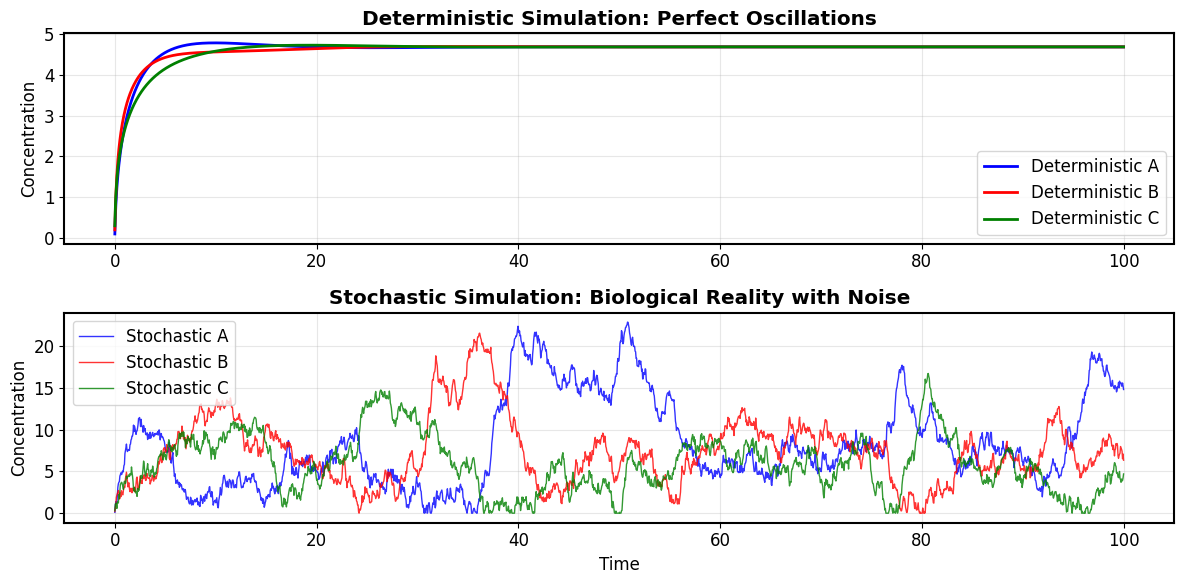

✅ Stochastic simulation completed!


In [ ]:
# Add biological noise to simulate real cells
print("🎲 Adding stochastic noise to simulate biological reality...")

# Simple Euler-Maruyama method for stochastic simulation
dt = t[1] - t[0]
sigma = 2.0  # Noise strength

# Initialize arrays
A_stoch = np.zeros_like(t)
B_stoch = np.zeros_like(t)
C_stoch = np.zeros_like(t)
A_stoch[0], B_stoch[0], C_stoch[0] = y0

# Stochastic simulation
for i in range(1, len(t)):
    current_state = [A_stoch[i-1], B_stoch[i-1], C_stoch[i-1]]
    derivatives = repressilator(current_state, t[i-1], alpha0, alpha, n, delta)

    # Euler-Maruyama step: deterministic + noise
    A_stoch[i] = A_stoch[i-1] + derivatives[0]*dt + sigma*np.sqrt(dt)*np.random.normal()
    B_stoch[i] = B_stoch[i-1] + derivatives[1]*dt + sigma*np.sqrt(dt)*np.random.normal()
    C_stoch[i] = C_stoch[i-1] + derivatives[2]*dt + sigma*np.sqrt(dt)*np.random.normal()

    # Ensure non-negative concentrations
    A_stoch[i] = max(0, A_stoch[i])
    B_stoch[i] = max(0, B_stoch[i])
    C_stoch[i] = max(0, C_stoch[i])

# Compare deterministic vs stochastic
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, A, label='Deterministic A', color='blue', linewidth=2)
plt.plot(t, B, label='Deterministic B', color='red', linewidth=2)
plt.plot(t, C, label='Deterministic C', color='green', linewidth=2)
plt.ylabel('Concentration')
plt.title('Deterministic Simulation: Perfect Oscillations', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(t, A_stoch, label='Stochastic A', color='blue', linewidth=1, alpha=0.8)
plt.plot(t, B_stoch, label='Stochastic B', color='red', linewidth=1, alpha=0.8)
plt.plot(t, C_stoch, label='Stochastic C', color='green', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Stochastic Simulation: Biological Reality with Noise', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('stochastic_vs_deterministic.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Stochastic simulation completed!")